# 번개장터 데이터 전처리

In [105]:
import pandas as pd

In [ ]:
original_path = "C:\Potenup\SecondHanded-Strollers-PredictedPrice\data\\raw\\bungaejangter.csv"
csv_path = "C:\Potenup\SecondHanded-Strollers-PredictedPrice\data\\preprocessed\\bungaejangter_cleaned.csv"

## csv 데이터 확인

In [107]:
df = pd.read_csv(original_path, encoding="utf-8", engine="python", on_bad_lines="warn")

In [108]:
df.head(1)

,keyword,is_completed,uploaded_date,link,location,id,title,detail,condition,price,images_url
0,유모차 스토케,False,2025-08-20 07:43:46.595629,https://m.bunjang.co.kr/products/330635984?q=%...,서울특별시 용산구 한강로동,356fcf58-2382-46c5-b404-397e30c5e2a5,스토케 트레일즈 유모차,출고가 150만원 이었습니다\n사진 그대로 구매시 30만원\n겨울용 패딩시트 제외시...,사용감 적음,200000.0,['https://media.bunjang.co.kr/product/33063598...


In [109]:
df.shape

(148, 11)

## 관계 없는 데이터 삭제

In [110]:
# 부가부 데이터 삭제
df = df[~df['title'].str.contains("부가부", na=False)].reset_index(drop=True)

In [111]:
not_stroller_pattern = "유모차 컵홀더|스케토 컵홀더|스토케 풋머프|스토케풋머프|스토케 풋워머|스토케 방한 풋머프|스토케 방한용품|스토케 방한커버|방한커버|방수커버|컵홀더|파라솔|신생아시트|신생아패드|발받침대|발판|유모차 커버|유모차 악세사리|기저귀가방|방풍비닐"
df = df[~df['title'].str.contains(not_stroller_pattern, na=False)]

In [112]:
# 방한 관련 키워드
winter_keywords = "풋머프|풋워머|워머|핸드머프|핸드워머|방한커버|방한용품|방수커버|방수패드|방한"
df = df[~df['title'].str.contains(winter_keywords, na=False)]

In [113]:
# 유모차가 없는 경우 확인
df_filtered = df[~df['title'].str.contains('유모차', na=False)]
df_filtered['title']

134    스토케 익스플로리 엑스 시그니처 블랙
140      스토케 익스플로리 v6 판매합니다
Name: title, dtype: object

In [114]:
df.to_csv(csv_path, index=0)

## 변수 정리

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 144
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   keyword        122 non-null    object 
 1   is_completed   122 non-null    bool   
 2   uploaded_date  122 non-null    object 
 3   link           122 non-null    object 
 4   location       91 non-null     object 
 5   id             122 non-null    object 
 6   title          122 non-null    object 
 7   detail         122 non-null    object 
 8   condition      122 non-null    object 
 9   price          122 non-null    float64
 10  images_url     122 non-null    object 
dtypes: bool(1), float64(1), object(9)
memory usage: 10.6+ KB


In [116]:
df["detail"] = df["detail"].str.replace("\n", "", regex=False)
df.to_csv(csv_path, index=0)

In [117]:
df["uploaded_date"] = pd.to_datetime(df["uploaded_date"])
df.to_csv(csv_path, index=0)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 144
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   keyword        122 non-null    object        
 1   is_completed   122 non-null    bool          
 2   uploaded_date  122 non-null    datetime64[ns]
 3   link           122 non-null    object        
 4   location       91 non-null     object        
 5   id             122 non-null    object        
 6   title          122 non-null    object        
 7   detail         122 non-null    object        
 8   condition      122 non-null    object        
 9   price          122 non-null    float64       
 10  images_url     122 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(8)
memory usage: 10.6+ KB


## 가격 이상치 체크

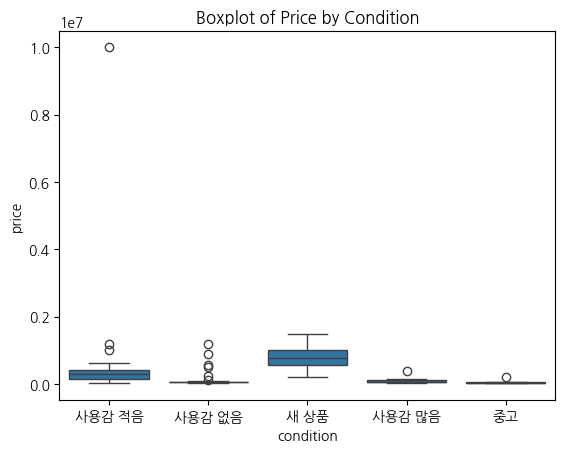

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

sns.boxplot(x="condition", y="price", data=df)
plt.title("Boxplot of Price by Condition")
plt.show()

In [120]:
df[df['condition'] == '사용감 적음']['price']

0       200000.0
2       400000.0
10     9999999.0
11      400000.0
12      130000.0
15      155000.0
16       30000.0
17      350000.0
21       50000.0
23      400000.0
25      500000.0
27      430000.0
30      630000.0
37      250000.0
38       80000.0
39      550000.0
40      350000.0
41      527790.0
45      250000.0
57       35000.0
61       60000.0
62      200000.0
100      95000.0
105     171000.0
125     190000.0
132     300000.0
134    1200000.0
140     420000.0
143    1000000.0
Name: price, dtype: float64

In [121]:
df = df.drop(df[df["price"] == 9999999.0].index)

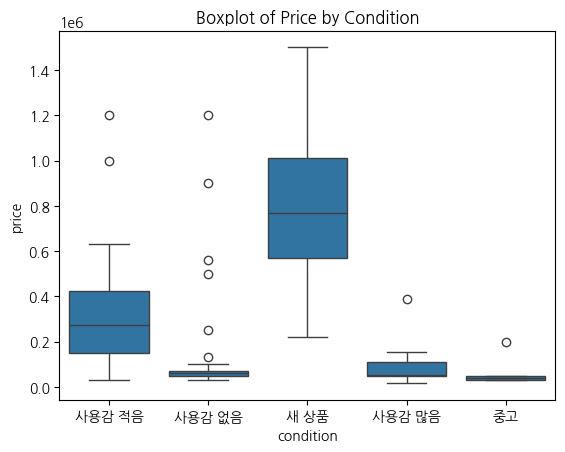

In [122]:
sns.boxplot(x="condition", y="price", data=df)
plt.title("Boxplot of Price by Condition")
plt.show()

In [123]:
df.to_csv(csv_path, index=0)

## 지역 데이터 전처기

In [ ]:
# full_location 컬럼에 원본 보관
df["full_location"] = df["location"]

# 마지막 단어(= 동)만 남기기
df["location"] = df["location"].str.split().str[-1]
df.to_csv(csv_path, index=0)

## 모델명 추출

In [124]:
import pandas as pd
df = pd.read_csv(csv_path, encoding="utf-8", engine="python", on_bad_lines="warn")
origin_df = df.copy()

In [125]:
patterns = {
    "yoyo": "요요|yoyo",
    "explori": "익스플로리|xplory",
    "trailz": "트레일즈|trailz",
    "beat": "비트|beat",
    "crusi": "크루시|crusi",
    "scoot": "스쿠트|scoot",
}
has_yoyo = df['title'].str.contains(patterns['yoyo'], na=False, case=False) | df['detail'].str.contains(patterns['yoyo'], na=False, case=False)

has_explori = df['title'].str.contains(patterns['explori'], na=False, case=False) | df['detail'].str.contains(patterns['explori'], na=False, case=False)

has_trailz = df['title'].str.contains(patterns['trailz'], na=False, case=False) | df['detail'].str.contains(patterns['trailz'], na=False, case=False)

has_beat = df['title'].str.contains(patterns['beat'], na=False, case=False) | df['detail'].str.contains(patterns['beat'], na=False, case=False)

has_crusi = df['title'].str.contains(patterns['crusi'], na=False, case=False) | df['detail'].str.contains(patterns['crusi'], na=False, case=False)

has_scoot = df['title'].str.contains(patterns['scoot'], na=False, case=False) | df['detail'].str.contains(patterns['yoyo'], na=False, case=False)

In [126]:
df[has_yoyo | has_trailz | has_explori | has_beat | has_crusi | has_scoot].count()

keyword          28
is_completed     28
uploaded_date    28
link             28
location         25
id               28
title            28
detail           28
condition        28
price            28
images_url       28
dtype: int64

In [127]:
# 기본값 None으로 열 추가
df["model"] = None

# 각 행별로 매칭된 모델 모두 합치기
def find_models(row):
    models = []
    for model, pattern in patterns.items():
        if (pd.notna(row["title"]) and pd.Series([row["title"]]).str.contains(pattern, case=False).any()) \
           or (pd.notna(row["detail"]) and pd.Series([row["detail"]]).str.contains(pattern, case=False).any()):
            models.append(model)
    return ", ".join(models) if models else None

df["model"] = df.apply(find_models, axis=1)

In [128]:
df['model'].unique()

array(['trailz', 'explori', 'yoyo', None, 'beat'], dtype=object)

In [129]:
delux_pattern = '디럭스|delux'
has_delux = df['title'].str.contains(delux_pattern, na=False, case=False) | df['detail'].str.contains(delux_pattern, na=False, case=False)

basic_pattern = '절충형'
has_basic = df['title'].str.contains(basic_pattern, na=False, case=False) | df['detail'].str.contains(basic_pattern, na=False, case=False)

In [130]:
df[has_delux | has_basic].count()

keyword          79
is_completed     79
uploaded_date    79
link             79
location         56
id               79
title            79
detail           79
condition        79
price            79
images_url       79
model            10
dtype: int64

In [131]:
# 기본값 None
df["model_type"] = None  

# 조건에 따라 값 지정
df.loc[has_delux, "model_type"] = "디럭스"
df.loc[has_basic, "model_type"] = "절충형"

In [132]:
df.to_csv(csv_path, index=0)

# 결론

In [141]:
df = pd.read_csv(csv_path)
df.head(1)

,keyword,is_completed,uploaded_date,link,location,id,title,detail,condition,price,images_url,model,model_type,full_location
0,유모차 스토케,False,2025-08-20 07:43:46.595629,https://m.bunjang.co.kr/products/330635984?q=%...,한강로동,356fcf58-2382-46c5-b404-397e30c5e2a5,스토케 트레일즈 유모차,출고가 150만원 이었습니다사진 그대로 구매시 30만원겨울용 패딩시트 제외시 20만...,사용감 적음,200000.0,['https://media.bunjang.co.kr/product/33063598...,trailz,NaN,서울특별시 용산구 한강로동


광고 및 이상 데이터 제거하니 총 121개의 데이터가 나옴

모델이 특정되는 데이터는 총 28개

모델 타입이 특정되는 데이터는 79개

모델 또는 모델 타입이 특정 되는 데이터는 97개

In [144]:
df[~df['model'].isna()].count()

keyword          28
is_completed     28
uploaded_date    28
link             28
location         25
id               28
title            28
detail           28
condition        28
price            28
images_url       28
model            28
model_type       10
full_location    25
dtype: int64

In [142]:
df[~df['model_type'].isna()].count()

keyword          79
is_completed     79
uploaded_date    79
link             79
location         56
id               79
title            79
detail           79
condition        79
price            79
images_url       79
model            10
model_type       79
full_location    56
dtype: int64

In [143]:
df[~df['model'].isna() | ~df['model_type'].isna()].count()

keyword          97
is_completed     97
uploaded_date    97
link             97
location         72
id               97
title            97
detail           97
condition        97
price            97
images_url       97
model            28
model_type       79
full_location    72
dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   keyword        121 non-null    object 
 1   is_completed   121 non-null    bool   
 2   uploaded_date  121 non-null    object 
 3   link           121 non-null    object 
 4   location       91 non-null     object 
 5   id             121 non-null    object 
 6   title          121 non-null    object 
 7   detail         121 non-null    object 
 8   condition      121 non-null    object 
 9   price          121 non-null    float64
 10  images_url     121 non-null    object 
 11  model          28 non-null     object 
 12  model_type     79 non-null     object 
 13  full_location  91 non-null     object 
dtypes: bool(1), float64(1), object(12)
memory usage: 12.5+ KB


# 데이터 분석

In [145]:
df = pd.read_csv(csv_path)

## 모델 별 상품 수

In [146]:
import pandas as pd
import numpy as np
import re

model_counts = (
    df.groupby("model", dropna=False)
        .size()
        .sort_values(ascending=False)
        .rename("count")
)
print("\n[모델 별 상품 수]\n", model_counts)


[모델 별 상품 수]
 model
NaN        93
explori    19
yoyo        4
trailz      3
beat        2
Name: count, dtype: int64


## 모델 별 상품 가격 평균

In [148]:
model_price_mean = (
    df.groupby("model", dropna=False)["price"]
        .mean()
        .sort_values(ascending=False)
        .rename("avg_price")
)
print("\n[모델 별 평균 가격]\n", model_price_mean)

# 보조: 모델별 요약(개수/평균/중앙/표준편차)
model_price_summary = (
    df.groupby("model", dropna=False)["price"]
        .agg(count="count", mean="mean", median="median", std="std")
        .sort_values("mean", ascending=False)
)
print("\n[모델 별 가격 요약]\n", model_price_summary)



[모델 별 평균 가격]
 model
yoyo       524500.000000
explori    401515.263158
trailz     383333.333333
beat       180000.000000
NaN        110107.526882
Name: avg_price, dtype: float64

[모델 별 가격 요약]
          count           mean    median            std
model                                                 
yoyo         4  524500.000000  530000.0  140288.987451
explori     19  401515.263158  350000.0  366329.516182
trailz       3  383333.333333  200000.0  407226.390762
beat         2  180000.000000  180000.0   98994.949366
NaN         93  110107.526882   60000.0  193694.807699


## 상품 상태 별 가격 차이

In [154]:
# 상태별 평균/중앙값 비교
status_price_summary = (
    df.groupby("condition", dropna=False)["price"]
      .agg(count="count", mean="mean", median="median", std="std")
      .sort_values("mean", ascending=False)
)
print("\n[판매 상태 별 가격 요약]\n", status_price_summary)

# 상태별 평균 가격 ‘차이’(기준: 전체 평균 혹은 첫 상태와의 차이)
overall_mean = df["price"].mean()
diff_from_overall = (status_price_summary["mean"] - overall_mean).rename("diff_from_overall")
print("\n[상태별 평균 가격 - 전체 평균 차이]\n", diff_from_overall)


[판매 상태 별 가격 요약]
            count           mean    median            std
condition                                               
새 상품           4  814500.000000  769000.0  529340.155288
사용감 적음        28  334063.928571  275000.0  275843.114944
사용감 없음        74  102256.756757   60000.0  180149.619005
사용감 많음         9  101222.222222   53000.0  116469.714709
중고             6   64500.000000   38500.0   66737.545655

[상태별 평균 가격 - 전체 평균 차이]
 condition
새 상품      637005.867769
사용감 적음    156569.796340
사용감 없음    -75237.375475
사용감 많음    -76271.910009
중고       -112994.132231
Name: diff_from_overall, dtype: float64
